In [108]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
url = 'https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv'
dados = pd.read_csv(url)
dados.head(1)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes


In [110]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [111]:
linhas = dados.shape[0]
colunas = dados.shape[1]

print('A base de dados tem %s linhas e %s colunas.' %(linhas,colunas))

A base de dados tem 1000 linhas e 21 colunas.


In [112]:
duplicados = dados.duplicated()
duplicados = duplicados.sum()
print('A base de dados tem %s duplicados.' %(duplicados))

A base de dados tem 0 duplicados.


In [113]:
b = {'critical account/ other credits existing (not at this bank)' : 1, 
     'existing credits paid back duly till now': 2,
     'delay in paying off in the past' : 3,
     'no credits taken/ all credits paid back duly' : 4,
     'all credits at this bank paid back duly' : 5}
dados['historico_credito'] = dados['historico_credito'].map(b)

a = {'domestic appliances' : 1, 
     '(vacation - does not exist?)': 2,
     'radio/television' : 3,
     'car (new)' : 4,
     'car (used)' : 5,
     'business' : 6,
     'repairs' : 7,
     'education' : 8,
     'furniture/equipment' : 9,
    'retraining' : 10}
dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)

c = {'< 0 DM' : 1, 
     '0 <= ... < 200 DM': 2,
     'no checking account' : 3,
     '>= 200 DM / salary assignments for at least 1 year' : 4}
dados['conta_corrente'] = dados['conta_corrente'].map(c)

d = {'unknown/ no savings account' : 1, 
     '... < 100 DM': 2,
     '500 <= ... < 1000 DM ' : 3,
     '.. >= 1000 DM ' : 4,
     '100 <= ... < 500 DM' :5}
dados['reserva_cc'] = dados['reserva_cc'].map(d)

e = {'.. >= 7 years' : 1, 
     '1 <= ... < 4 years': 2,
     '4 <= ... < 7 years' : 3,
     'unemployed' : 4,
     '... < 1 year ' :5}
dados['tempo_emprego_atual'] = dados['tempo_emprego_atual'].map(e)

f = {'male : single' : 1, 
     'female : divorced/separated/married': 2,
     'male : divorced/separated' : 3,
     'male : married/widowed' : 4}
dados['sexo_est_civil'] = dados['sexo_est_civil'].map(f)

g = {'none' : 1, 
     'guarantor': 2,
     'co-applicant' : 3}
dados['outros_fiadores'] = dados['outros_fiadores'].map(g)

h = {'real estate' : 1, 
     'if not A121 : building society savings agreement/ life insurance': 2,
     'unknown / no property' : 3,
     'if not A121/A122 : car or other, not in attribute 6': 4}
dados['propriedade'] = dados['propriedade'].map(h)

i = {'none' : 1, 
     'bank': 2,
     'stores' : 3}
dados['outros_planos_financiamento'] = dados['outros_planos_financiamento'].map(i)

j = {'own' : 1, 
     'for free': 2,
     'rent' : 3}
dados['tipo_residencia'] = dados['tipo_residencia'].map(j)

k = {'skilled employee / official' : 1, 
     'unskilled - resident': 2,
     'management/ self-employed/ highly qualified employee/ officer' : 3,
     'unemployed/ unskilled - non-resident': 4}
dados['status_emprego'] = dados['status_emprego'].map(k)

l = {'yes, registered under the customers name ' : 1, 
     'none': 2}
dados['telefone'] = dados['telefone'].map(l)

m = {'yes' : 1, 
     'no': 2}
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map(m)
dados.head(5)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,1,1,1169,1,1,4,1,...,4,1,67,1,1,2,1,1,1,1
1,1,2,48,2,1,5951,2,2,2,2,...,2,1,22,1,1,1,1,1,2,1
2,0,3,12,1,2,2096,2,3,2,1,...,3,1,49,1,1,1,2,2,2,1
3,0,1,42,2,3,7882,2,3,2,1,...,4,2,45,1,2,1,1,2,2,1
4,1,1,24,3,4,4870,2,2,3,1,...,4,3,53,1,2,2,1,2,2,1


In [114]:
nulos = dados.isnull()
nulos.sum()

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

In [115]:
y= dados['default']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [116]:
x = dados.drop(columns = 'default')
x.head()

,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,outros_fiadores,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,1,6,1,1,1169,1,1,4,1,1,4,1,67,1,1,2,1,1,1,1
1,2,48,2,1,5951,2,2,2,2,1,2,1,22,1,1,1,1,1,2,1
2,3,12,1,2,2096,2,3,2,1,1,3,1,49,1,1,1,2,2,2,1
3,1,42,2,3,7882,2,3,2,1,2,4,2,45,1,2,1,1,2,2,1
4,1,24,3,4,4870,2,2,3,1,1,4,3,53,1,2,2,1,2,2,1


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
SEED = 77
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.30 , random_state = SEED)

base_treino = treino_x.shape[0]
base_teste = teste_x.shape[0]

print('A base de teste de treino tem %s elementos e a base de teste tem %s elementos.' %(base_treino, base_teste))

A base de teste de treino tem 700 elementos e a base de teste tem 300 elementos.


In [119]:
dados['conta_corrente'].unique()

array([1, 2, 3, 4], dtype=int64)

In [120]:
from sklearn.linear_model import LogisticRegression

In [121]:
#acuracia de treino
modelo = LogisticRegression(max_iter=1000)
reg_logistica = modelo.fit(treino_x, treino_y)
print(modelo.score(treino_x, treino_y))


0.76


C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
import scorecardpy as sc

In [123]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0], d

In [124]:

from sklearn.metrics import accuracy_score

In [125]:
acuracia = accuracy_score(teste_y, previsoes)
acuracia = round(acuracia, 2)*100
acuracia

77.0

In [126]:
import sklearn
print(sklearn.__version__)


1.5.0


In [127]:
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

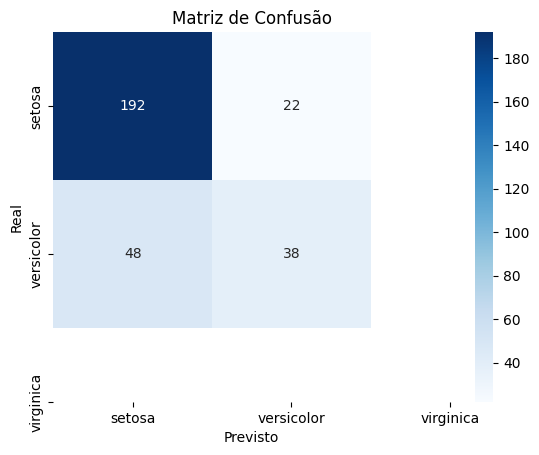

In [128]:
# Carregar o dataset
iris = load_iris()
X, y = iris.data, iris.target
# Fazer previsões
x_pred = modelo.predict(teste_x)
# Calcular a matriz de confusão
cm = confusion_matrix(teste_y, x_pred)

# Plotar a matriz de confusão usando seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [129]:
from sklearn.metrics import classification_report

In [130]:
print(classification_report(teste_y, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       214
           1       0.63      0.44      0.52        86

    accuracy                           0.77       300
   macro avg       0.72      0.67      0.68       300
weighted avg       0.75      0.77      0.75       300



In [131]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc 0.758096066072593


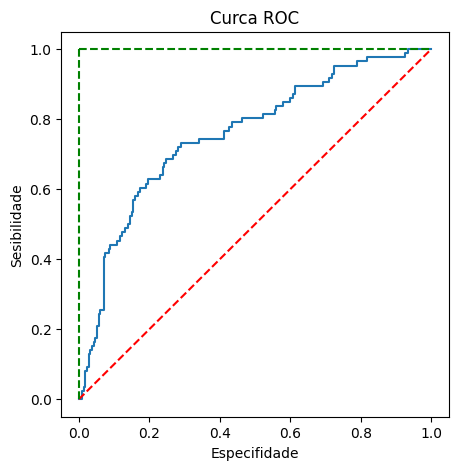

In [132]:
prob_previsao = modelo.predict_proba(teste_x)[:,1]

#tfp = taxa de falsos positivos, tvp = taxa de verdadeiros positivos
tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
print('roc_auc', roc_auc_score(teste_y, prob_previsao))

plt.subplots(1, figsize =(5,5))
plt.title('Curca ROC')
plt.plot(tfp, tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sesibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()


In [133]:
variaveis_analise = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']
dados[variaveis_analise].describe()

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.686000,35.546000,20.903000,3271.258000,0.300000
std,0.931811,11.375469,12.058814,2822.736876,0.458487
min,1.000000,19.000000,4.000000,250.000000,0.000000
25%,1.000000,27.000000,12.000000,1365.500000,0.000000
50%,1.000000,33.000000,18.000000,2319.500000,0.000000
75%,2.000000,42.000000,24.000000,3972.250000,1.000000
max,4.000000,75.000000,72.000000,18424.000000,1.000000


In [134]:
dados['sexo_est_civil'].value_counts(), dados['default'].value_counts()

(sexo_est_civil
 1    548
 2    310
 4     92
 3     50
 Name: count, dtype: int64,
 default
 0    700
 1    300
 Name: count, dtype: int64)

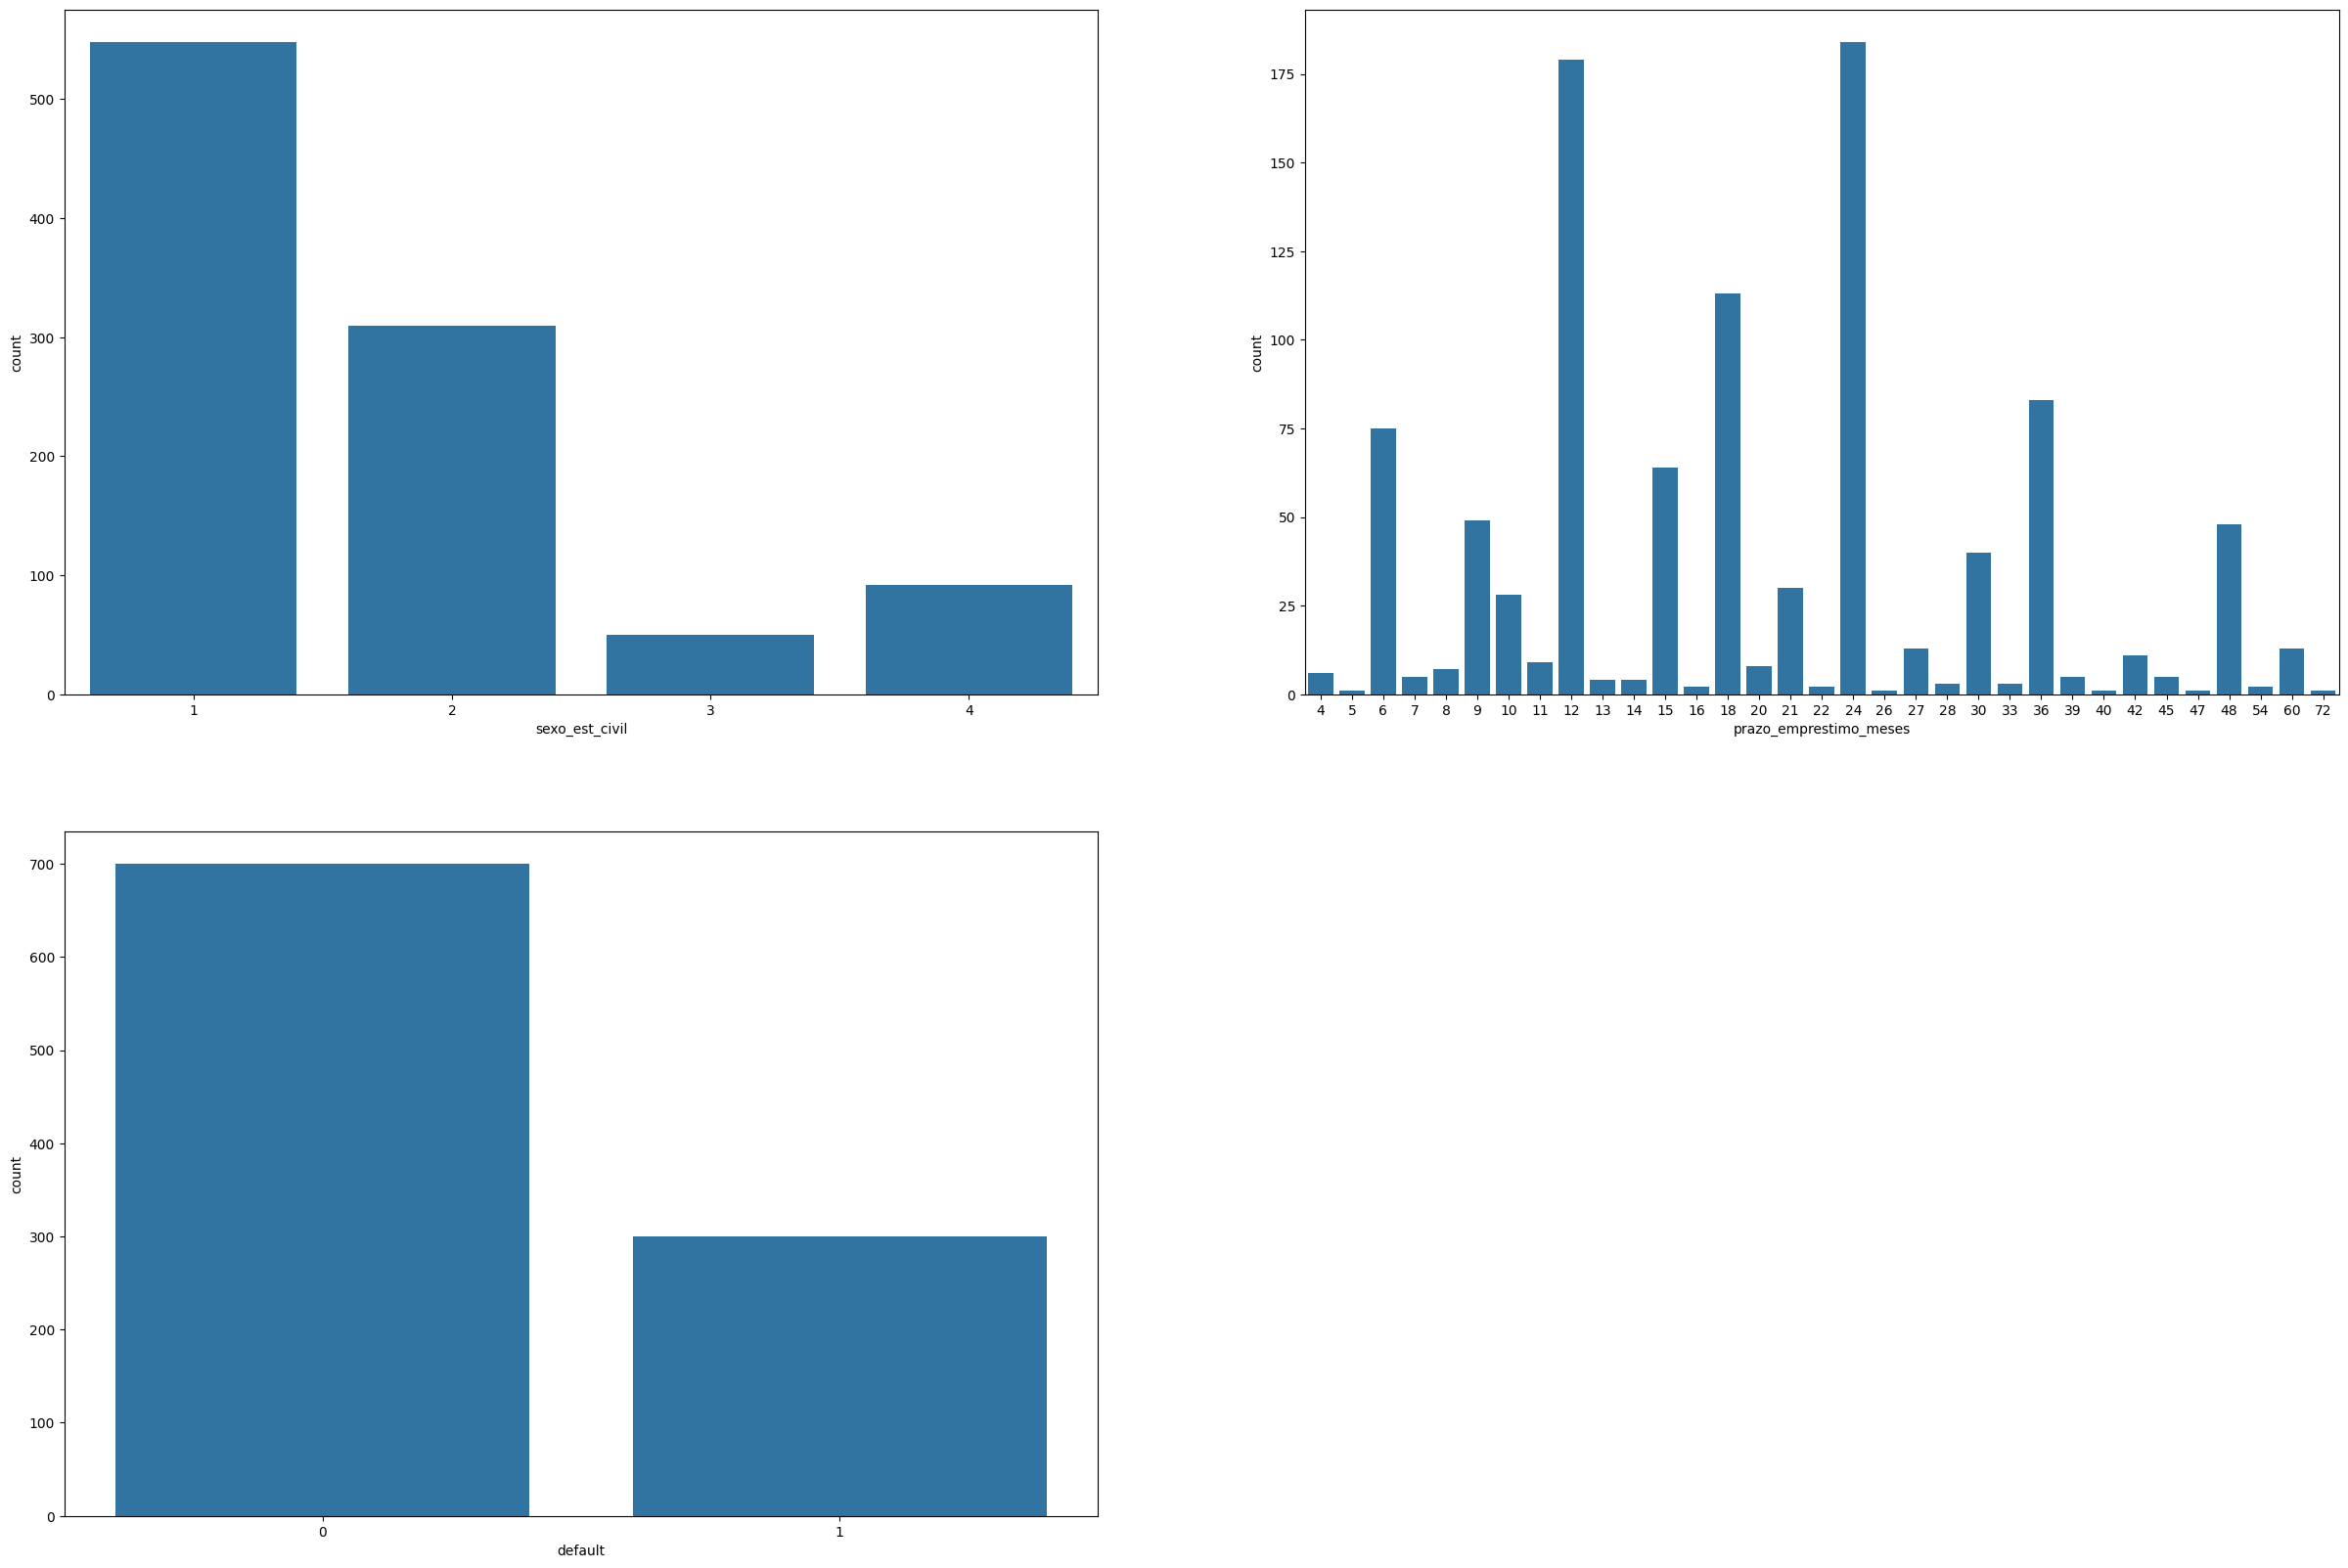

In [135]:

histogramas = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

lista_histogramas = list(enumerate(histogramas))

plt.figure(figsize = (30,20))

for i in lista_histogramas:
    plt.subplot(2, 2, i[0]+1)
    sns.countplot(x = i[1], data = dados)

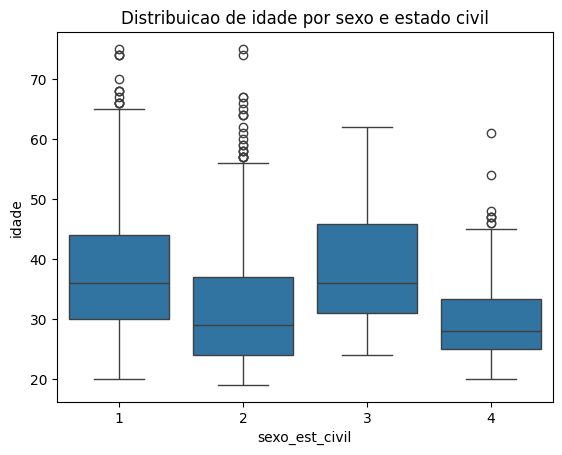

In [136]:
sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = dados)
plt.title('Distribuicao de idade por sexo e estado civil')
plt.show()

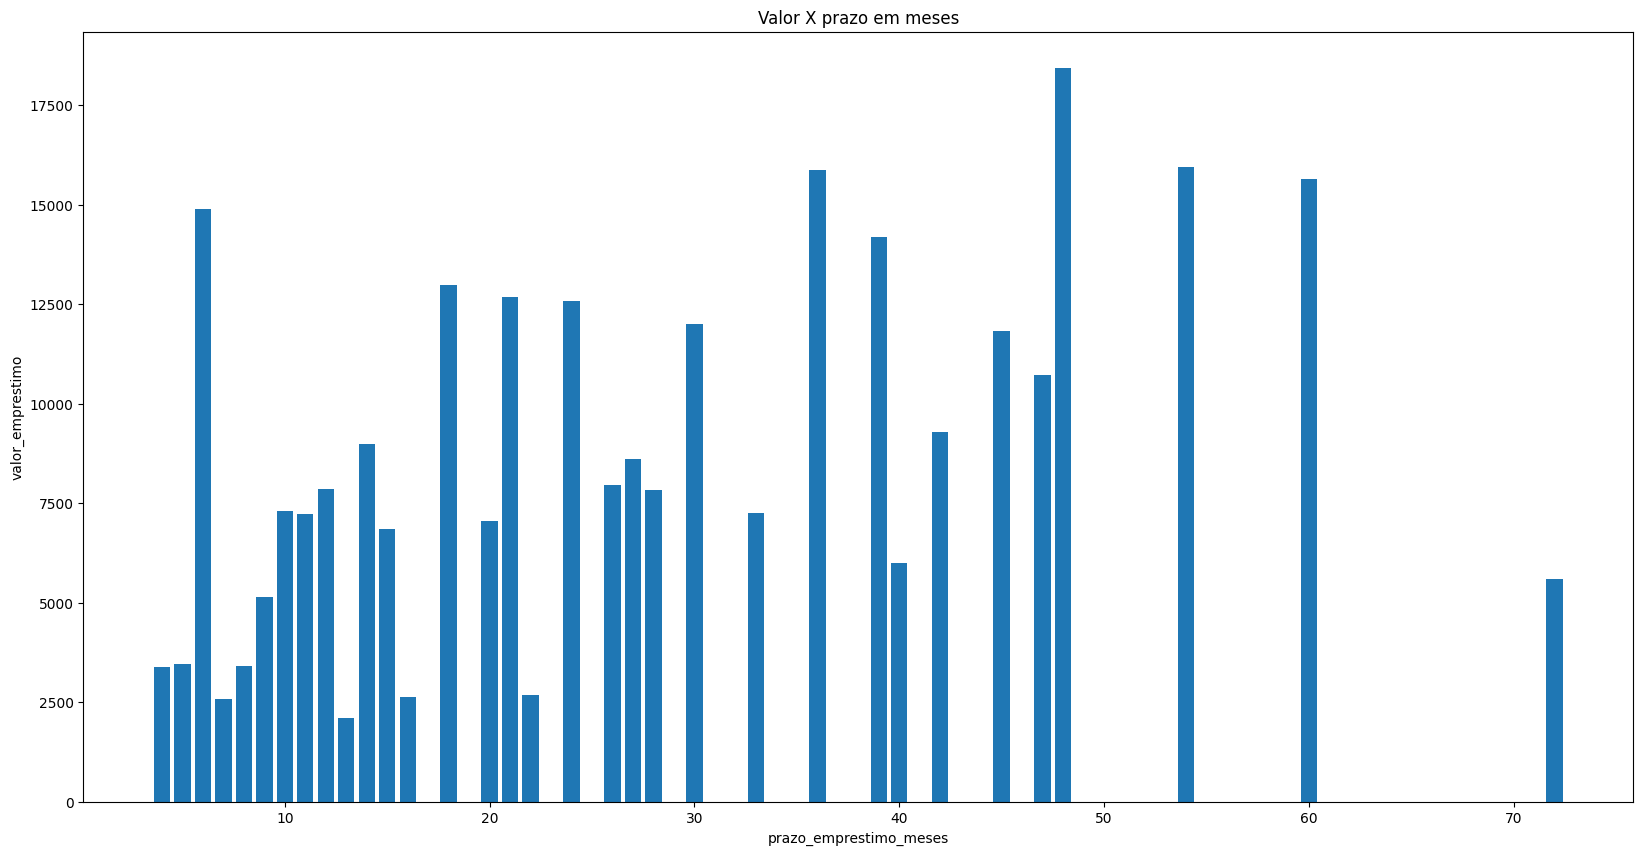

In [137]:
plt.figure(figsize = (20,10))

plt.bar(dados.prazo_emprestimo_meses, dados.valor_emprestimo)

plt.xlabel('prazo_emprestimo_meses')
plt.ylabel('valor_emprestimo')
plt.title('Valor X prazo em meses')

plt.show()

In [138]:
#categorias da variavel 'sexo_est_civil'

#male : divorced/separated = 1
#female : divorced/separated/married = 2
#male : single = 3
#male : married/widowed = 4
#female : single = 5

#criando a variavel 'sexo'

## 1 = mulher
## 0 = homem

#criando a variavel 'estado_civil'
## 1 = solteira
## 0 = casada/divorciada/viúva

dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}

dados['sexo'] = dados['sexo_est_civil'].map(dic_sexo)
dados['estado_civil'] = dados['sexo_est_civil'].map(dic_est_civil)

dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil
0,0,1,6,1,1,1169,1,1,4,1,...,67,1,1,2,1,1,1,1,0,0
1,1,2,48,2,1,5951,2,2,2,2,...,22,1,1,1,1,1,2,1,1,0
2,0,3,12,1,2,2096,2,3,2,1,...,49,1,1,1,2,2,2,1,0,0
3,0,1,42,2,3,7882,2,3,2,1,...,45,1,2,1,1,2,2,1,0,0
4,1,1,24,3,4,4870,2,2,3,1,...,53,1,2,2,1,2,2,1,0,0


In [139]:
#função para retirar colunas da base

colunas_retiradas = ['sexo_est_civil', 'sexo']
base_dados = dados.drop(columns = colunas_retiradas)

In [140]:
#função roda modelo: ajuste e validacao
def roda_modelo(base_dados , classificador):
#separando a base de modelagem e vavriavel resposta 
    y = base_dados['default']
    x = base_dados.drop(columns = 'default')
#separando a base de treino e teste
    SEED = 77
    treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size = 0.30, random_state = SEED)

    base_treino = treino_x.shape[0]
    base_teste = teste_x.shape[0]

    print('A base de treino tem %s elementos e a base de teste tem %s elementos.'%(base_treino, base_teste))
    print(100*'-')
#ajustando modelo com base de teste 

#modelo = LogisticRegression(max_iter=1000)
    modelo = classificador 
    modelo.fit(treino_x, treino_y)

#matriz de confusão
    # matriz_confusao = plot_confusion_matrix(modelo, teste_x, teste_y, values_format = '.3g', cmap = 'Blues')
    # plt.title('Matriz de Confusao')
    # plt.show
    iris = load_iris()
    X, y = iris.data, iris.target
    # Fazer previsões
    x_pred = modelo.predict(teste_x)
    # Calcular a matriz de confusão
    cm = confusion_matrix(teste_y, x_pred)

    # Plotar a matriz de confusão usando seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()
#classification report
    previsoes = modelo.predict(teste_x)
    print(100*'-')
    print('/nClassification Report: ')
    print(classification_report(teste_y, previsoes))

#curva ROC e AUC]

    print(100*'-')
    prob_previsao = modelo.predict_proba(teste_x)[:, 1]
    tfp, tvp, limite = roc_curve(teste_y, prob_previsao)
    print('roc_auc', roc_auc_score(teste_y, prob_previsao))

    plt.figure(figsize=(5, 5))
    plt.subplot(1, 1, 1)  # Define um único subplot
    plt.title('Curva ROC')
    plt.plot(tfp, tvp)
    plt.plot([0, 1], ls="--", c='red')  # Plotando linha guia pontilhada vermelha
    plt.plot([0, 0], [1, 0], ls="--", c='green'), plt.plot([1, 1], ls="--", c='green')  # Plotando linha guia pontilhada verde
    plt.xlabel('Especificidade')
    plt.ylabel('Sensibilidade')
    plt.show()

    return modelo, cm

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------


C:\Users\Windows\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


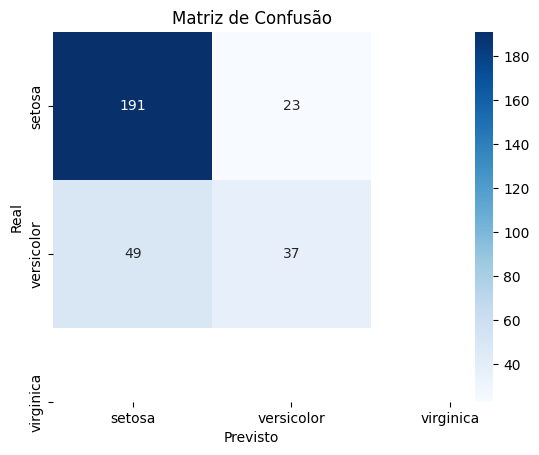

----------------------------------------------------------------------------------------------------
/nClassification Report: 
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       214
           1       0.62      0.43      0.51        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.74      0.76      0.75       300

----------------------------------------------------------------------------------------------------
roc_auc 0.7715170615083677


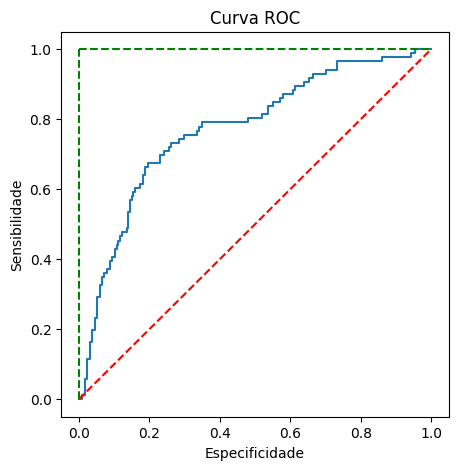

(LogisticRegression(max_iter=1000),
 array([[191,  23],
        [ 49,  37]], dtype=int64))

In [141]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [ ]:
#criando 'faixa_idade' para variavel 'idade'

## 18 - 30 = 1
## 31 - 40 = 2
## 41 - 50 = 3
## 51 - 60 = 4
## 61 - 70 = 5
## 71 - 80 = 6

dados['faixa_idade'] = pd.cut(x = dados['idade'], bins=[18, 30, 40, 50, 60, 70, 80], labels = [1, 2, 3, 4, 5, 6])
dados.head(1)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade
0,0,1,6,1,1,1169,1,1,4,1,...,1,1,2,1,1,1,1,0,0,5


In [ ]:
dados['faixa_prazo_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 12, 24, 36, 48, 60, 72], labels = [1, 2, 3, 4, 5, 6])
dados.head(1)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,1,2,1,1,1,1,0,0,5,1


In [ ]:
dados['faixa_valor_emprestimo'] = pd.cut(x = dados['prazo_emprestimo_meses'], bins=[1, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000], labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
dados.head(1)

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,sexo,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,6,1,1,1169,1,1,4,1,...,2,1,1,1,1,0,0,5,1,1


In [ ]:
#função para retirar colunas da base

colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns = colunas_retiradas)

A base de treino tem 700 elementos e a base de teste tem 300 elementos.
----------------------------------------------------------------------------------------------------


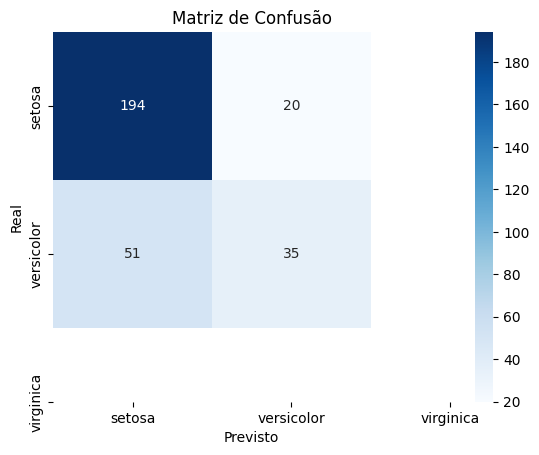

----------------------------------------------------------------------------------------------------
/nClassification Report: 
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       214
           1       0.64      0.41      0.50        86

    accuracy                           0.76       300
   macro avg       0.71      0.66      0.67       300
weighted avg       0.75      0.76      0.75       300

----------------------------------------------------------------------------------------------------
roc_auc 0.7701586611606173


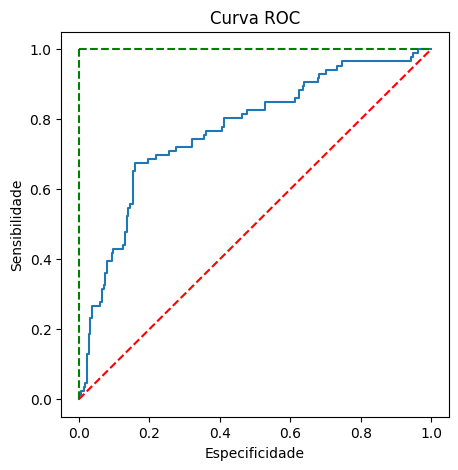

(LogisticRegression(max_iter=1000),
 array([[194,  20],
        [ 51,  35]], dtype=int64))

In [ ]:
roda_modelo(base_dados, LogisticRegression(max_iter=1000))

In [ ]:
colunas_retiradas = ['sexo_est_civil', 'sexo', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo']
base_dados = dados.drop(columns=colunas_retiradas)
base_dados.head()

,default,conta_corrente,historico_credito,proposito_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,outros_fiadores,anos_residencia_atual,propriedade,...,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro,estado_civil,faixa_idade,faixa_prazo_emprestimo,faixa_valor_emprestimo
0,0,1,1,1,1,1,4,1,4,1,...,1,2,1,1,1,1,0,5,1,1
1,1,2,2,1,2,2,2,1,2,1,...,1,1,1,1,2,1,0,1,4,1
2,0,3,1,2,2,3,2,1,3,1,...,1,1,2,2,2,1,0,3,1,1
3,0,1,2,3,2,3,2,2,4,2,...,2,1,1,2,2,1,0,3,4,1
4,1,1,3,4,2,2,3,1,4,3,...,2,2,1,2,2,1,0,4,2,1


In [ ]:
#treinar modelo com a base inteira 

#treinar modelo com a base inteira

modelo = LogisticRegression(max_iter=1000)
y = base_dados['default']
x= base_dados.drop(columns = 'default')
modelo.fit(x,y)




LogisticRegression(max_iter=1000)

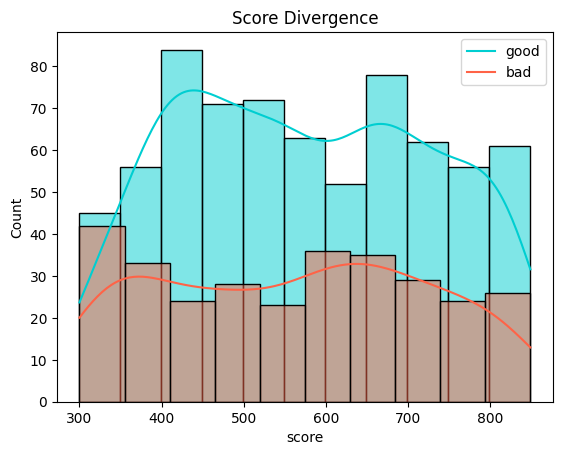

In [146]:
# # Imports
# import numpy as np
# import pandas as pd
# import scipy.stats as stats
# from scipy.optimize import minimize
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split

# # Supondo que `dados` já foi carregado

# # Dividindo os dados em treino e teste
# train, test = train_test_split(dados, test_size=0.3, random_state=77)

# # Definindo a função sc.scorecard_ply (substitua pela função real que você usa)
# # Esta é uma função placeholder; você deve usar a função real de sua biblioteca de scoring
# def scorecard_ply(data, card, print_step=0):
#     # Placeholder: substituir pelo cálculo real do score
#     scores = np.random.randint(300, 850, size=len(data))
#     return pd.DataFrame({'score': scores})

# # Placeholder para o 'card'
# card = {}

# # Calculando os scores
# data_gc_score = scorecard_ply(dados, card, print_step=0)
# train_score = scorecard_ply(train, card, print_step=0)
# test_score = scorecard_ply(test, card, print_step=0)

# # Supondo que a coluna de flag do default é 'default' e está no dataframe 'dados'
# score_with_target = pd.concat([data_gc_score, dados['default']], axis=1)

# # Separando os scores de bons e maus pagadores
# score_total = score_with_target['score']
# score_good = score_with_target[score_with_target['default'] == 0]['score']
# score_bad = score_with_target[score_with_target['default'] == 1]['score']

# # Função para plotar a distribuição dos scores
# def plot_score_distribution(score1, score2, label1, label2, title):
#     sns.histplot(score1, color="darkturquoise", label=label1, kde=True)
#     sns.histplot(score2, color="tomato", label=label2, kde=True)
#     plt.legend(labels=[label1, label2])
#     plt.title(title)
#     plt.show()

# # Plotando a divergência dos scores entre bons e maus pagadores
# plot_score_distribution(score_good, score_bad, 'good', 'bad', 'Score Divergence')
